# Set Path & Files

In [1]:
import os

CUSTOM_MODEL_NAME = 'my_centernet_resnet50_v2' 
PRETRAINED_MODEL_NAME = 'centernet_resnet50_v2_512x512_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/centernet_resnet50_v2_512x512_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'
TF_ws = 'TensorFlow_ws'

paths = {
    'WORKSPACE_PATH': os.path.join(TF_ws , 'workspace'),
    'SCRIPTS_PATH': os.path.join(TF_ws ,'scripts/preprocessing'),
    'APIMODEL_PATH': os.path.join(TF_ws ,'models'),
    'ANNOTATION_PATH': os.path.join(TF_ws , 'workspace','training_demo','annotations'),
    'IMAGE_PATH': os.path.join(TF_ws , 'workspace','training_demo','images'),
    'MODEL_PATH': os.path.join(TF_ws , 'workspace','training_demo','models'),
    'PRETRAINED_MODEL_PATH': os.path.join(TF_ws , 'workspace','training_demo','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join(TF_ws , 'workspace','training_demo','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join(TF_ws , 'workspace','training_demo','exported-models',CUSTOM_MODEL_NAME), 
    'PROTOC_PATH':os.path.join('protoc')
}

files = {
    'PIPELINE_CONFIG':os.path.join(TF_ws, 'workspace','training_demo','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

# Load Model & Label

In [2]:
# Download labels file
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings
%matplotlib inline

PATH_TO_MODEL_DIR = paths['OUTPUT_PATH']
PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'],use_display_name=True)

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))

# print out what are detected!!

# Load pipeline config and build a detection model
def load_model_from_ckpt():
  '''configs = config_util.get_configs_from_pipeline_file(PATH_TO_MODEL_DIR+'/pipeline.config')
  detection_model = model_builder.build(model_config=configs['model'], is_training=False)

  ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
  ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'],'checkpoint','ckpt-0')).expect_partial()'''

# print out what are detected!!
def print_detect_detials(detections, threshold=0.5):
    for i in range(num_detections):
        detect_score = detections['detection_scores'][i]
        index_class = detections['detection_classes'][i]

        if detect_score > threshold:
            print(f"{category_index[index_class]['name']} , score = {detect_score*100:.2f} %")

print('pass')

pass


In [3]:
category_index

{1: {'id': 1, 'name': 'Card'},
 2: {'id': 2, 'name': 'Hate'},
 3: {'id': 3, 'name': 'miniheart'},
 4: {'id': 4, 'name': 'Like'},
 5: {'id': 5, 'name': 'phone'}}

In [4]:
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

# Image

In [5]:
import os 

IMAGE_PATHS = os.path.join(paths['IMAGE_PATH'],'test')
# Create Image_name from directory
Image_name = []
for root, dirs, files_d in os.walk(IMAGE_PATHS):
    print(files_d)

for x in files_d:
        if x.find(".jpg") != -1:
            Image_name.append(x)

['.gitkeep', 'Card.11.jpg', 'Card.11.xml', 'Card.12.jpg', 'Card.12.xml', 'Card.13.jpg', 'Card.13.xml', 'Card.14.jpg', 'Card.14.xml', 'Hate.11.jpg', 'Hate.11.xml', 'Hate.12.jpg', 'Hate.12.xml', 'Hate.13.jpg', 'Hate.13.xml', 'Hate.14.jpg', 'Hate.14.xml', 'Heart.11.jpg', 'Heart.11.xml', 'Heart.12.jpg', 'Heart.12.xml', 'Heart.13.jpg', 'Heart.13.xml', 'Heart.14.jpg', 'Heart.14.xml', 'Like.11.jpg', 'Like.11.xml', 'Like.12.jpg', 'Like.12.xml', 'Like.13.jpg', 'Like.13.xml', 'Like.14.jpg', 'Like.14.xml', 'Phone.11.jpg', 'Phone.11.xml', 'Phone.12.jpg', 'Phone.12.xml', 'Phone.13.jpg', 'Phone.13.xml', 'Phone.14.jpg', 'Phone.14.xml']


Running inference for TensorFlow_ws\workspace\training_demo\images\test\Card.11.jpg... 
Card , score = 95.12 %
Card , score = 87.18 %
Done
Running inference for TensorFlow_ws\workspace\training_demo\images\test\Card.12.jpg... 
Card , score = 98.19 %
Card , score = 95.69 %
Done


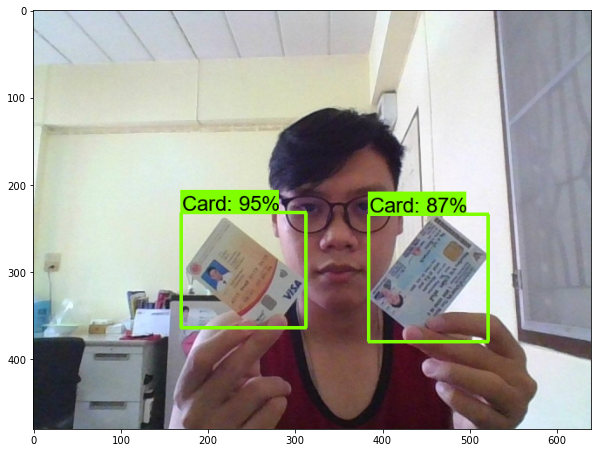

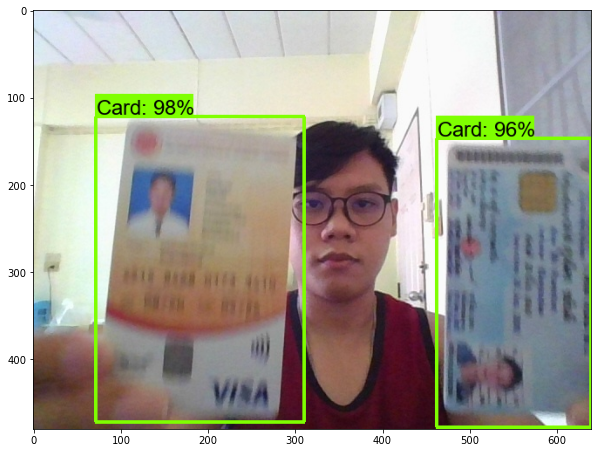

In [6]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings
%matplotlib inline

for i in Image_name[:2]:

    image_path = os.path.join(IMAGE_PATHS,i)
    print('Running inference for {}... '.format(image_path), end='\n')

    image_np = load_image_into_numpy_array(image_path)

    # Things to try:
    # Flip horizontally
    # image_np = np.fliplr(image_np).copy()

    # Convert image to grayscale
    # image_np = np.tile(
    #     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image_np)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]

    # input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                   for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
    image_np_with_detections = image_np.copy()

    # Print Detail
    print_detect_detials(detections,threshold=0.5)

    viz_utils.visualize_boxes_and_labels_on_image_array(
          image = image_np_with_detections,
          boxes = detections['detection_boxes'],
          classes = detections['detection_classes'],
          scores = detections['detection_scores'],
          category_index = category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=20,
          min_score_thresh=0.5,
          agnostic_mode=False)

    plt.figure(figsize=(10,10))
    plt.imshow(image_np_with_detections)
    print('Done')
plt.show()

In [7]:
detections.keys()

dict_keys(['detection_boxes_strided', 'detection_scores', 'detection_classes', 'detection_boxes', 'detection_multiclass_scores', 'num_detections'])

In [8]:
detections['detection_classes']

array([1, 1, 1, 1, 4, 1, 1, 4, 1, 4, 4, 1, 5, 1, 4, 4, 5, 5, 5, 4, 1, 1,
       4, 5, 5, 4, 1, 5, 1, 4, 1, 1, 2, 5, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3,
       1, 1, 1, 2, 4, 1, 3, 1, 5, 1, 1, 1, 2, 2, 1, 5, 1, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 5, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 4, 1, 1, 1, 2, 1,
       4, 1, 1, 1, 4, 1, 2, 4, 5, 5, 5, 1], dtype=int64)

In [9]:
detections['detection_scores'] > 0.5

array([ True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

# Video Detection

In [10]:
import cv2
import numpy as np
import time

cap = cv2.VideoCapture(0)

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)

    input_tensor = tf.convert_to_tensor(image_np,dtype=tf.uint8)
    input_tensor = input_tensor[tf.newaxis, ...]
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    image_np_with_detections = image_np.copy()

    print_detect_detials(detections,threshold=0.5)

    viz_utils.visualize_boxes_and_labels_on_image_array(
          image = image_np_with_detections,
          boxes = detections['detection_boxes'],
          classes = detections['detection_classes'],
          scores = detections['detection_scores'],
          category_index = category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=20,
          min_score_thresh=0.5,
          agnostic_mode=False)

    cv2.imshow('object detection', cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

miniheart , score = 59.48 %
Like , score = 54.94 %
Like , score = 57.89 %
Like , score = 61.93 %
Like , score = 51.41 %
Like , score = 65.62 %
Like , score = 53.08 %
Like , score = 71.68 %
Like , score = 53.18 %
Like , score = 65.51 %
Hate , score = 67.48 %
Hate , score = 87.54 %
Hate , score = 74.91 %
Hate , score = 71.34 %
Hate , score = 79.03 %
phone , score = 71.20 %
phone , score = 79.98 %
phone , score = 87.01 %
phone , score = 65.61 %
phone , score = 53.74 %
